In [1]:
#import os
#import time
#import re
def measure_internal_temp():
        tempPi = os.popen("vcgencmd measure_temp").readline()
        tempPi = re.sub('[^0-9][^\d]+','', tempPi)       #Strip all non numerical and decimal point from string.

        return (tempPi)
#while True:
        #print(measure_internal_temp())
        #time.sleep(1)

In [2]:
def kalman(gain, tempKalman, predictedVariance, variance, predictedTemp):
    gain = predictedVariance/(predictedVariance + r)
    tempKalman = predictedTemp + gain*(tempPiFloat - predictedTemp)
    #tempKalman = predictedTemp + gain*(tempExt - predictedTemp)
    #tempKalman = predictedTemp + gain*(tempDHT22 - predictedTemp)
    variance = (1-gain)*predictedVariance
    predictedTemp = tempKalman
    predictedVariance = variance + q
    return [gain, tempKalman, predictedVariance, variance, predictedTemp]

def kalman2(gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2):
    gain2 = predictedVariance2/(predictedVariance2 + r2)
    tempKalman2 = predictedTemp2 + gain2*(tempPiFloat - predictedTemp2)
    #tempKalman = predictedTemp + gain*(tempExt - predictedTemp)
    #tempKalman = predictedTemp + gain*(tempDHT22 - predictedTemp)
    variance2 = (1-gain2)*predictedVariance2
    predictedTemp2 = tempKalman2
    predictedVariance2 = variance2 + q2
    return [gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2]

def kalman3(gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3):
    gain3 = predictedVariance3/(predictedVariance3 + r3)
    tempKalman3 = predictedTemp3 + gain3*(tempPiFloat - predictedTemp3)
    variance3 = (1-gain3)*predictedVariance3
    predictedTemp3 = tempKalman3
    predictedVariance3 = variance3 + q3
    return [gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3]

def kalman4(gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4):
    gain4 = predictedVariance4/(predictedVariance4 + r4)
    tempKalman4 = predictedTemp4 + gain4*(tempPiFloat - predictedTemp4)
    variance4 = (1-gain4)*predictedVariance4
    predictedTemp4 = tempKalman4
    predictedVariance4 = variance4 + q4
    return [gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4]
    

EWMF =  52.679073333740234

TempPi = BLACK
My Filter = PURPLE
EWMA = YELLOW
TempPi_Kalman_1 = RED
TempPi_Kalman_2 = GREEN
TempPi_Kalman_3 = BLUE
TempPi_Kalman_4 = ORANGE
b=  1.07
r1 =  25, q1 = 0.01
r2 = 25, q2= 0.1
r3 = 25, q3= 0.5
r4 = 25, q4= 5


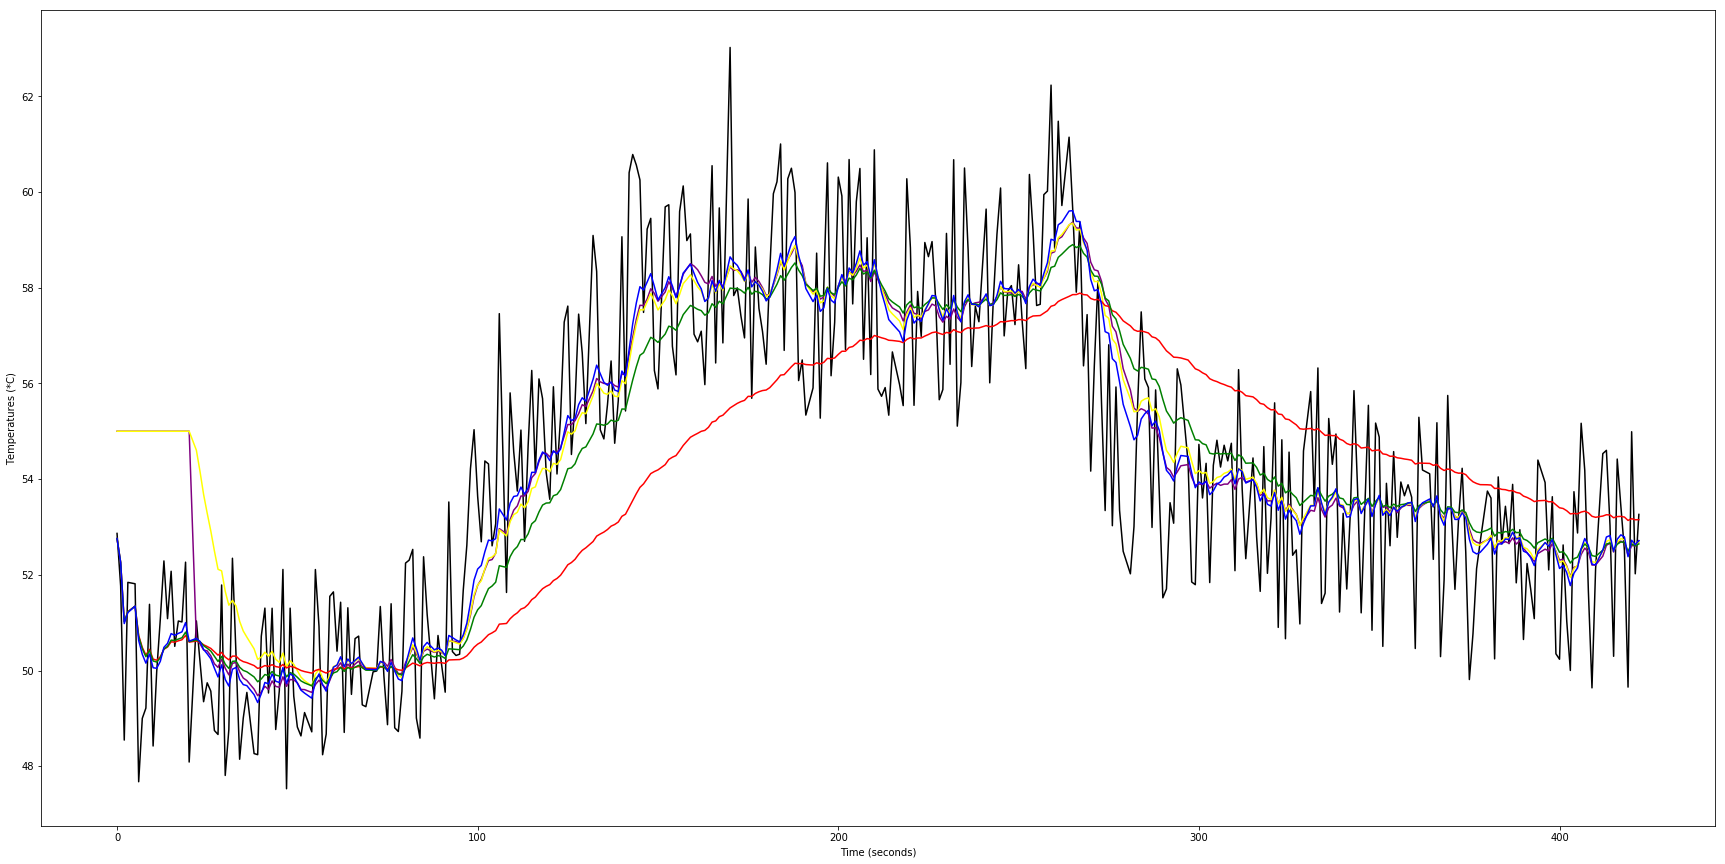

In [10]:
import os
import re
import datetime
import time

# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
from array import *
import matplotlib.pyplot as plt
import random

from IPython.display import display, clear_output
plt.rcParams['figure.figsize'] = [30, 15]

i = 0

#Kalman variables
tempKalman = 0.
gain = 0.
variance = 10000.
predictedTemp = 10.

tempKalman2 = 0.
gain2 = 0.
variance2 = 10000.
predictedTemp2 = 10.

tempKalman3 = 0.
gain3 = 0.
variance3 = 10000.
predictedTemp3 = 10.

tempKalman4 = 0.
gain4 = 0.
variance4 = 10000.
predictedTemp4 = 10.

################################################################
q = 0.1             # Red # Tune these constants for the data type ... Lower value makes smoother.
r = 50                   # Tune these constants for the data type ... Higher value makes smoother.
################################################################
q2 = 0.01         # Green
r2 = 100
################################################################
q3 = 0.5           # Blue
r3 = 25
################################################################
q4 = 1          # Orange
r4 = 10
################################################################
n = 400           # Number of readings to take (iterations).
################################################################
################################################################
q = 0.01             # Red # Tune these constants for the data type ... Lower value makes smoother.
r = 25                   # Tune these constants for the data type ... Higher value makes smoother.
################################################################
q2 = 0.1         # Green
r2 = 25
################################################################
q3 = 0.5           # Blue
r3 = 25
################################################################
q4 = 5          # Orange
r4 = 25
################################################################
n = 400           # Number of readings to take (iterations).
################################################################
predictedVariance = variance + q
predictedVariance2 = variance2 + q2
predictedVariance3 = variance3 + q3
predictedVariance4 = variance4 + q4

now = datetime.datetime.now()

timeStringS = now.strftime("%S")
timeStringM = now.strftime("%M")
timeStringH = now.strftime("%H")
initialIntTimeString = int(timeStringS) + (int(timeStringM) * 60) + (int(timeStringH) * 60 * 60)

print('..... PROCESSING .....')
clear_output(wait=True)

def getSensorData():

    global intTimeString
    global tempPiFloat

    now = datetime.datetime.now()
    timeStringH = now.strftime("%H")
    timeStringS = now.strftime("%S")
    timeStringM = now.strftime("%M")
    intTimeString = int(timeStringS) + (int(timeStringM) * 60) + (int(timeStringH) * 60 * 60)- initialIntTimeString
    
    tempPiFloat = float(measure_internal_temp())
    
    # Artificially make the temperature reading more noisy:
    tempPiFloat = round (tempPiFloat + (tempPiFloat * random.uniform(-0.05, 0.05)),3)
    
    
    # Print the values
    print('Countdown: ',i)
    print('Pi internal temp = {}*C'.format(tempPiFloat))
    print('Kalman gain 1=' , round (gain,4))
    print('Kalman gain 2=' , round (gain2,4))
    print('Kalman gain 3=' , round (gain3,4))
    print('Kalman gain 4=' , round (gain4,4), end ="")
    clear_output(wait=True)
    #print()
    time.sleep(1)


array_TempPi = array('f', [])
y = array('f', [])
array_d = array('f', [])
averagingA = array('f', [])
averagingB = array('f', [])
array_PiTempKalman = array('f', [])
array_PiTempKalman2 = array('f', [])
array_PiTempKalman3 = array('f', [])
array_PiTempKalman4 = array('f', [])
array_Time = array('i', [])

i = n
for x in range(n):
    try:
        getSensorData()
        
        gain, tempKalman, predictedVariance, variance, predictedTemp = kalman(gain, tempKalman, predictedVariance, variance, predictedTemp)
        gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2 = kalman2(gain2, tempKalman2, predictedVariance2, variance2, predictedTemp2)
        gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3 = kalman3(gain3, tempKalman3, predictedVariance3, variance3, predictedTemp3)
        gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4 = kalman4(gain4, tempKalman4, predictedVariance4, variance4, predictedTemp4)
        
        array_TempPi.append(tempPiFloat)
        y.append(tempPiFloat)                       # We ran out of space for long descriptive names!
        array_PiTempKalman.append(tempKalman)
        array_PiTempKalman2.append(tempKalman2)
        array_PiTempKalman3.append(tempKalman3)
        array_PiTempKalman4.append(tempKalman4)
        array_Time.append(intTimeString)
        i = i -1
        
        # Create some averaging for comparison:
        a= 0.1         # Lower is smoother.
        b= 1.07         # A lower value of b gives better smoothing? Was 1.25.
        #c= a + a*np.power(b,1) + a*np.power(b,2) + a*np.power(b,3) + a*np.power(b,4)
        d = 50.0
        
        b_0 = 1
        b_1 = np.power(b,1)
        b_2 = np.power(b,2)
        b_3 = np.power(b,3)
        b_4 = np.power(b,4)
        b_5 = np.power(b,5)
        b_6 = np.power(b,6)
        b_7 = np.power(b,7)
        b_8 = np.power(b,8)
        b_9 = np.power(b,9)
        b_10 = np.power(b,10)
        b_11 = np.power(b,11)
        b_12 = np.power(b,12)
        b_13 = np.power(b,13)
        b_14 = np.power(b,14)
        b_15 = np.power(b,15)
        b_16 = np.power(b,16)
        b_17 = np.power(b,17)
        b_18 = np.power(b,18)
        b_19 = np.power(b,19)
        b_20 = np.power(b,20)

        #c= 1 + np.power(b,1) + np.power(b,2) + np.power(b,3) + np.power(b,4) ..... + np.power(b,20)
        c = (b_0 + b_1 + b_2 + b_3 + b_4 + b_5 + b_6 + b_7 + b_8 +  b_9 + b_10
             + b_11 + b_12 + b_13 + b_14 + b_15 + b_16 + b_17 + b_18 +  b_19 + b_20)
        
        if (x > 19):
            #print('C=',c)
            averagingB.append(    (1-a)*averagingB[x-1] + a*y[x]    )
            #array_TempPiAveragingA.append((array_TempPi[x-2]+array_TempPi[x-1]+array_TempPi[x])/3)
            #averagingA.append(( (a)*y[x-4]+ (a*b)*y[x-3]+ (a*b*b)*y[x-2]+ (a*b*b*b)*y[x-1]+ (a*b*b*b*b)*y[x] )/c)
            #averagingA.append(( y[x-4]+ b*(y[x-3])+ b*b*(y[x-2])+ b*b*b*(y[x-1])+ b*b*b*b*(y[x]) )/c)
            averagingA.append(( y[x-20]+ b_1*(y[x-19])+ b_2*(y[x-18])+ b_3*(y[x-17])+ b_4*(y[x-16])+ b_5*(y[x-15]) 
                               + b_6*(y[x-14])+ b_7*(y[x-13])+ b_8*(y[x-12])+ b_9*(y[x-11])+ b_10*(y[x-10])
                               + b_11*(y[x-9])+ b_12*(y[x-8])+ b_13*(y[x-7])+ b_14*(y[x-6])+ b_15*(y[x-5])
                               + b_16*(y[x-4])+ b_17*(y[x-3])+ b_18*(y[x-2])+ b_19*(y[x-1])+ b_20*(y[x])
                              )/c)
            #averagingA.append((1-a)*array_TempPi[x-1]+ a*array_TempPi[x])
            print('EWMF = ',averagingB[x])
        else:
            averagingA.append(55)                    # To avoid array shape mismatching.
            averagingB.append(55)
            
    except RuntimeError as error:
        # Errors happen fairly often, DHT's are hard to read, just keep going
        print(error.args[0])

plt.plot(array_Time, array_TempPi, color='black')
plt.plot(array_Time, averagingA, color='purple')
plt.plot(array_Time, averagingB, color='yellow')
plt.plot(array_Time, array_PiTempKalman, color='red')
plt.plot(array_Time, array_PiTempKalman2, color='green')
plt.plot(array_Time, array_PiTempKalman3, color='blue')
#plt.plot(array_Time, array_PiTempKalman4, color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperatures (*C)')

print()
print('TempPi = BLACK')
print('My Filter = PURPLE')
print('EWMA = YELLOW')
print('TempPi_Kalman_1 = RED')
print('TempPi_Kalman_2 = GREEN')
print('TempPi_Kalman_3 = BLUE')
print('TempPi_Kalman_4 = ORANGE')

print('b= ',b)

print('r1 = ', end =" ")
print(r, end =", ")
print('q1 = ', end ="")
print(q)

print('r2 = ', end ="")
print(r2, end =", ")
print('q2= ', end ="")
print(q2)

print('r3 = ', end ="")
print(r3, end =", ")
print('q3= ', end ="")
print(q3)

print('r4 = ', end ="")
print(r4, end =", ")
print('q4= ', end ="")
print(q4)